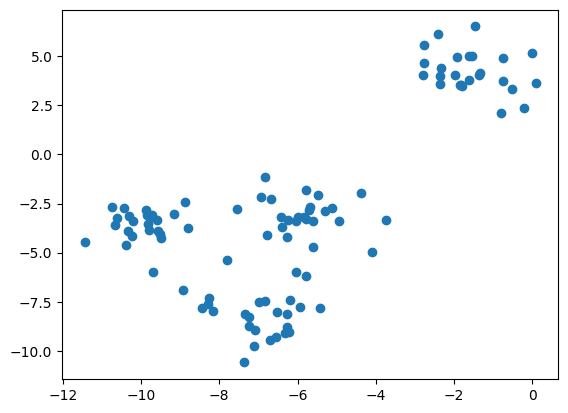

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances

X,y = datasets.make_blobs(n_samples=100, centers = 4, random_state = 1 )

plt.scatter (X[:,0], X[:,1])
plt.show()


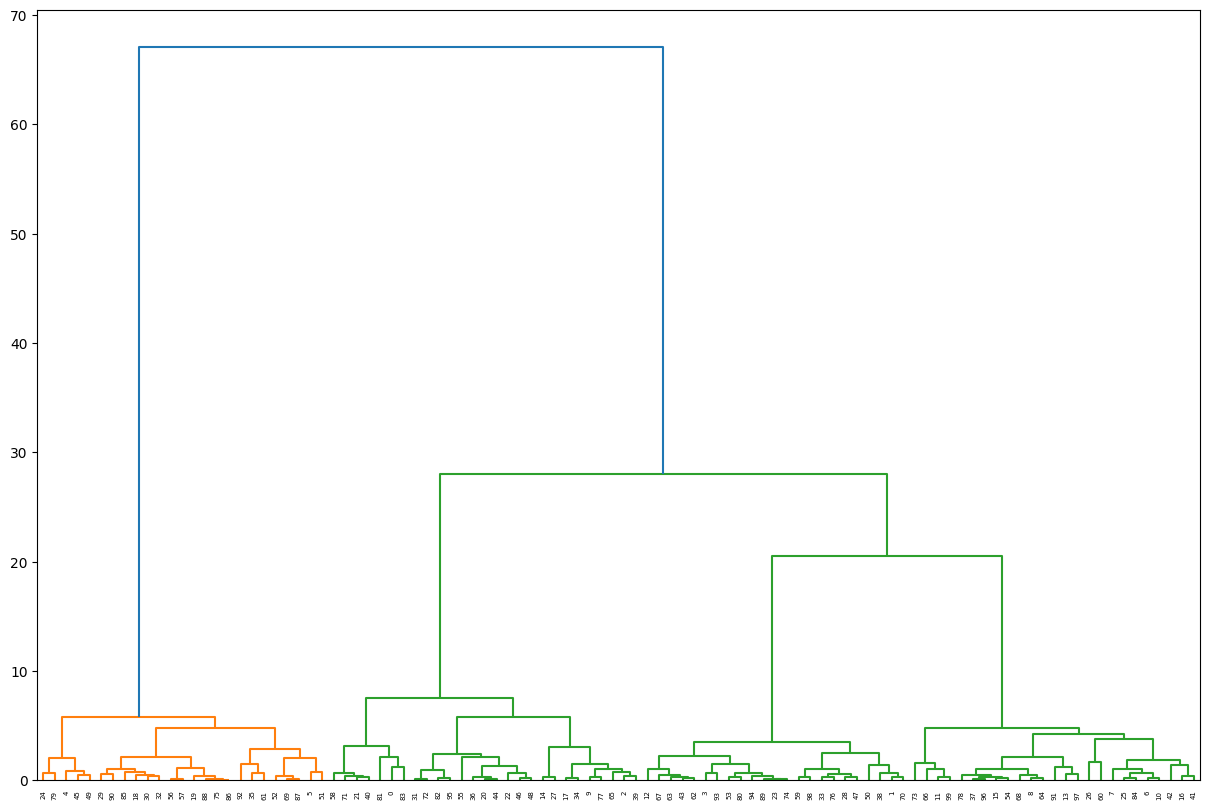

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd
 

# Реализация иерархической кластеризации при помощи функции linkage

mergings = linkage(X, method='ward')
 
# Строим дендрограмму, указав параметры удобные для отображения

plt.figure(figsize=(15, 10))
dendrogram(mergings)
plt.show()
 


In [3]:
T = fcluster(mergings, 10, 'distance') # distance or maxclust
print (T)

[2 3 2 3 1 1 4 4 4 2 4 4 3 4 2 4 4 2 1 1 2 2 2 3 1 4 4 2 3 1 1 2 1 3 2 1 2
 4 3 2 2 4 4 3 2 1 2 3 2 1 3 1 1 3 4 2 1 1 2 3 4 1 3 3 4 2 4 3 4 1 3 2 2 4
 3 1 3 2 4 1 3 2 2 2 4 1 1 1 1 3 1 4 1 3 3 2 4 4 3 4]


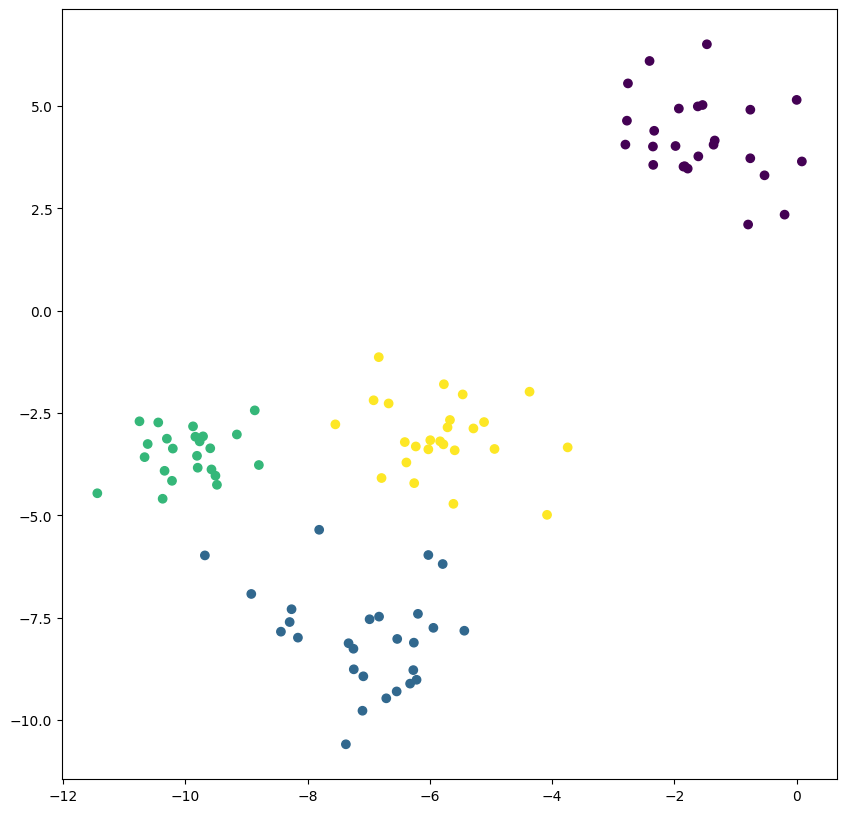

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter (X[:,0], X[:,1], c=T)
plt.show()


In [5]:
def update_cluster_centers(X, c):
    ix = np.where(c==1)
    mu[0,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==2)
    mu[1,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==3)
    mu[2,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==4)
    mu[3,:] = np.mean(X[ix,:], axis=1)
    return mu

In [6]:
mu = np.array([[0.0,0], [0,0], [0,0], [0,0]])
mu = update_cluster_centers(X, T)
print(mu)

[[-1.56129966  4.21898437]
 [-7.07614521 -7.97322589]
 [-9.96347347 -3.48454825]
 [-5.80277079 -3.06555518]]


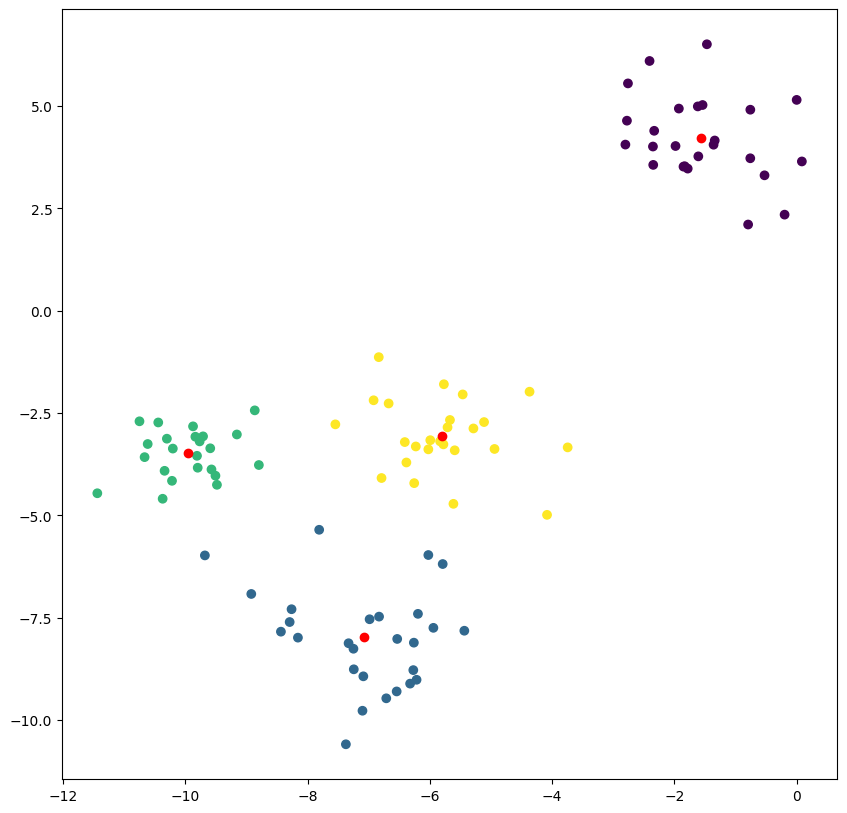

In [7]:
plt.figure(figsize = (10,10))
plt.scatter (X[:,0], X[:,1], c=T)
plt.scatter(mu[:,0],mu[:,1], c = 'red', marker = 'o')
plt.show()

In [8]:
#Сумма квадратов расстояний до центроида

cluster_dist=0
for j in range(0, np.shape(mu)[0]):
    summ = 0
    obj = np.where(T==j+1)
    for i in range(0, np.shape(obj)[1]):
        #print(euclidean_distances(mu[j].reshape(1,-1), X[obj[0][i],:].reshape(1,-1)))
        summ = summ + (euclidean_distances(mu[j].reshape(1,-1), X[obj[0][i],:].reshape(1,-1)))**2
    if(summ>0):
        summ = summ
    cluster_dist = cluster_dist + summ
    print(j,' custer dist: ', summ)
print ("Summary of squared cluster dist: ", cluster_dist)

print ("Mean summary of squared cluster dist: ", cluster_dist / np.shape(mu)[0])



0  custer dist:  [[43.11598405]]
1  custer dist:  [[67.14489804]]
2  custer dist:  [[16.25475117]]
3  custer dist:  [[38.36151505]]
Summary of squared cluster dist:  [[164.87714831]]
Mean summary of squared cluster dist:  [[41.21928708]]


# K-means

In [9]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=3)
model.fit(X)
all_predictions = model.predict(X)
print (all_predictions)

[2 0 2 0 1 1 0 0 0 2 0 0 0 0 2 0 0 2 1 1 2 2 2 0 1 0 0 2 0 1 1 2 1 0 2 1 2
 0 0 2 2 0 0 0 2 1 2 0 2 1 0 1 1 0 0 2 1 1 2 0 0 1 0 0 0 2 0 0 0 1 0 2 2 0
 0 1 0 2 0 1 0 0 2 0 0 1 1 1 1 0 1 0 1 0 0 2 0 0 0 0]


C:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


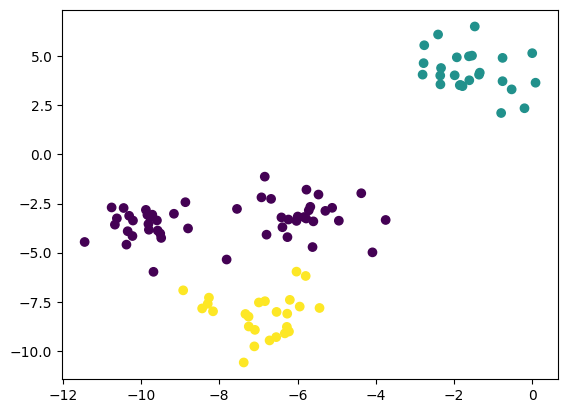

In [11]:
plt.scatter (X[:,0], X[:,1], c=all_predictions)
plt.show()

In [12]:
print('Sum of squared distances of samples to their closest cluster center.:', model.inertia_)

Sum of squared distances of samples to their closest cluster center.: 369.5556880065657


In [16]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10).fit(X)
    inertia.append((kmeans.inertia_))
print (inertia)

[3015.7692276196085, 766.1594927527818, 369.5556880065657, 158.76686919578418, 136.07776106430828, 119.41082903949317, 102.06541733084515, 90.40896447881985, 79.46925530063092]


<function matplotlib.pyplot.show(close=None, block=None)>

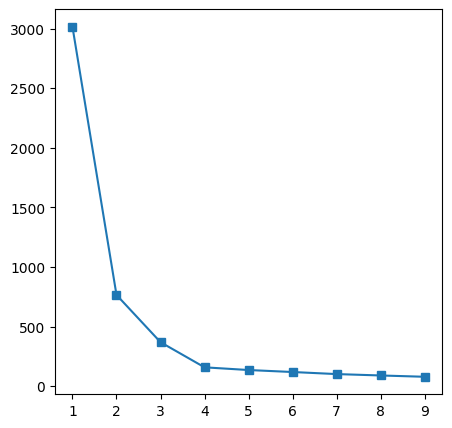

In [14]:
plt.figure(figsize=(5,5))
plt.plot(range (1,10), inertia, marker='s')

plt.show

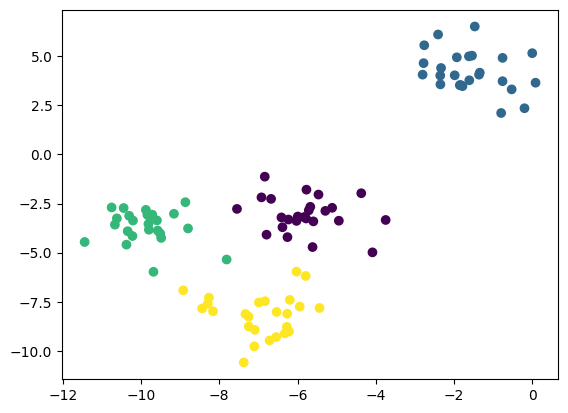

In [17]:
kmeans = KMeans(n_clusters=4, random_state=1, n_init=10).fit(X)
plt.scatter (X[:,0], X[:,1], c=kmeans.predict(X))
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

In [35]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
labels

Estimated number of clusters: 0
Estimated number of noise points: 100


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

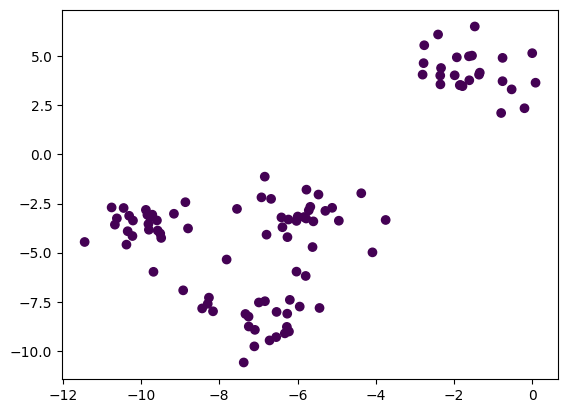

In [36]:
plt.scatter (X[:,0], X[:,1], c=labels)
plt.show()